from: Machine Learning Algorithms
By: Giuseppe Bonaccorso
Publisher: Packt Publishing

In [6]:
from sklearn.datasets import fetch_olivetti_faces
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [7]:
faces = fetch_olivetti_faces(data_home='/ML/faces/')

Through the data_home parameter, it is possible to specify in which local folder the dataset must be placed. A subset of samples is shown in the following figure:
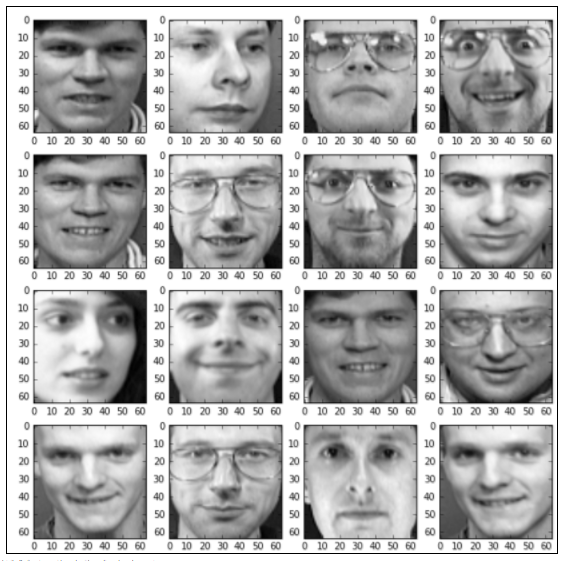

There are 40 different people and each of them is represented with 10 pictures of 64 x 64 pixels. The number of classes (40) is not high, but considering the similarity of many photos, a good classifier should be able to capture some specific anatomical details. Performing a grid search with non-linear kernels, we get:

In [8]:
param_grid = [
 { 
   'kernel': ['rbf', 'poly'],
   'C': [ 0.1, 0.5, 1.0, 1.5 ],
   'degree': [2, 3, 4, 5],
   'gamma': [0.001, 0.01, 0.1, 0.5]
 }
]

In [9]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=8,  n_jobs=multiprocessing.cpu_count())

In [10]:
gs.fit(faces.data, faces.target)
GridSearchCV(cv=8, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=8,
       param_grid=[{'kernel': ['rbf', 'poly'], 'C': [0.1, 0.5, 1.0, 1.5], 'gamma': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

GridSearchCV(cv=8, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=8,
       param_grid=[{'kernel': ['rbf', 'poly'], 'C': [0.1, 0.5, 1.0, 1.5], 'gamma': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [11]:
gs.best_estimator_
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
gs.best_score_

0.96999999999999997